# Projeto: Prever Insuficiência Cardíaca baseado em fatores clínicos e comportamentais.

#### A Insuficiência Cardíaca (causada por doenças cardiovasculares) é a principal causa de morte de vidas todos os anos, representando um percentual de 31% de todas as mortes mundiais. Este conjunto de dados contém doze características divididas em fatores clínicos e comportamentais como, por exemplo, nível de plaquetas e sódio sérico no sangue, fumante ou não, hipertenso ou não e pode ser utilizado para prever a mortalidade por doenças cardiovasculares. Objetivo do trabalho é realizar uma análise exploratória sobre o conjunto de dados e descobrir uma série de insights para auxiliar a equipe médica para a tomada de ações preventivas. 

In [321]:
# 1 - Importação de pacotes e bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
%matplotlib inline

In [2]:
# 2 - Importando os dados para o dataset

In [3]:
dadosClinicos = pd.read_csv("datasets/heart_failure_clinical_records_dataset.csv")

In [4]:
# Visualizando os primeiros registros e tipos de dados

In [5]:
dadosClinicos.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print(type(dadosClinicos))

<class 'pandas.core.frame.DataFrame'>


In [7]:
dadosClinicos.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [342]:
dadosClinicos

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,dieOrNot
0,75,False,582,False,20,True,265000.00,1.90,130,M,False,4,True
1,55,False,7861,False,38,False,263358.03,1.10,136,M,False,6,True
2,65,False,146,False,20,False,162000.00,1.30,129,M,True,7,True
3,50,True,111,False,20,False,210000.00,1.90,137,M,False,7,True
4,65,True,160,True,20,False,327000.00,2.70,116,F,False,8,True
5,90,True,47,False,40,True,204000.00,2.10,132,M,True,8,True
6,75,True,246,False,15,False,127000.00,1.20,137,M,False,10,True
7,60,True,315,True,60,False,454000.00,1.10,131,M,True,10,True
8,65,False,157,False,65,False,263358.03,1.50,138,F,False,10,True
9,80,True,123,False,35,True,388000.00,9.40,133,M,True,10,True


In [8]:
# Ajustando os tipos de dados, renomeando colunas.

In [9]:
dadosClinicos.age = dadosClinicos.age.astype(int)

In [10]:
dadosClinicos.anaemia = dadosClinicos.anaemia.astype(bool)

In [11]:
dadosClinicos.diabetes = dadosClinicos.diabetes.astype(bool)

In [12]:
dadosClinicos.high_blood_pressure = dadosClinicos.high_blood_pressure.astype(bool)

In [13]:
dadosClinicos['sex'] = dadosClinicos['sex'].replace(0, 'F')

In [14]:
dadosClinicos['sex'] = dadosClinicos['sex'].replace(1, 'M')

In [15]:
dadosClinicos.sex = dadosClinicos.sex.astype(str)

In [16]:
type(dadosClinicos.sex)

pandas.core.series.Series

In [17]:
dadosClinicos.smoking = dadosClinicos.smoking.astype(bool)

In [18]:
# paciente falheceu ou não durante o evento
dadosClinicos.DEATH_EVENT = dadosClinicos.DEATH_EVENT.astype(bool) 

In [19]:
dadosClinicos = dadosClinicos.rename(columns = {'DEATH_EVENT':'dieOrNot'}, inplace = False)

In [20]:
dadosClinicos.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'dieOrNot'],
      dtype='object')

In [21]:
# Verificação de valores Null (para a modelagem preditiva)

In [22]:
dadosClinicos.isnull().values.any()

False

In [23]:
# 3 - Análise Exploratória

In [24]:
# Informações estatísticas gerais

In [25]:
# Para variáveis quantitativas (numéricas)
dadosClinicos.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [26]:
# Número de linhas, colunas, tipo de cada dado
dadosClinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null int32
anaemia                     299 non-null bool
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null bool
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null bool
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null object
smoking                     299 non-null bool
time                        299 non-null int64
dieOrNot                    299 non-null bool
dtypes: bool(5), float64(2), int32(1), int64(4), object(1)
memory usage: 19.1+ KB


In [27]:
# Análise unilateral. Varíavel: age (quantitativa). Possível será CATEGÓRICA.

In [28]:
# Resumo estatístico básico
dadosClinicos.age.describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Text(0.5,1,'Boxplot de idades')

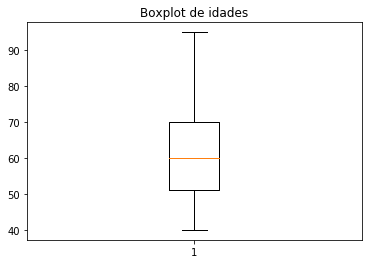

In [29]:
plt.boxplot(dadosClinicos.age)
plt.title('Boxplot de idades')

Text(0.5,1,'Histograma de idades')

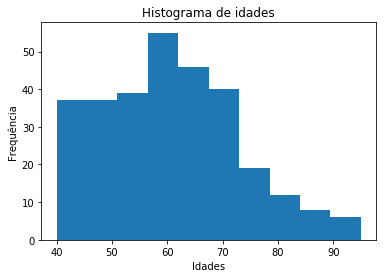

In [30]:
plt.hist(dadosClinicos.age)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Histograma de idades')

In [31]:
# Exploração da varíavel categórica anaemia

In [32]:
# Resumo estástico básico
dadosClinicos.anaemia.describe()

count       299
unique        2
top       False
freq        170
Name: anaemia, dtype: object

In [33]:
# Contagem de valores
dadosClinicos.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

Text(0.5,1,'Porcentagem de pacientes com anemia')

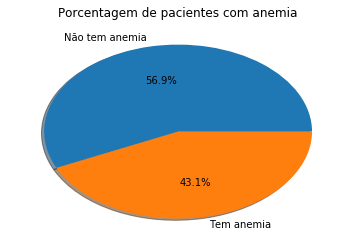

In [34]:
labelsNomesAnemia = "Não tem anemia","Tem anemia"
plt.pie(dadosClinicos.anaemia.value_counts(),labels = labelsNomesAnemia, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com anemia')

Text(0.5,1,'Quantidade de pacientes com e sem anemia')

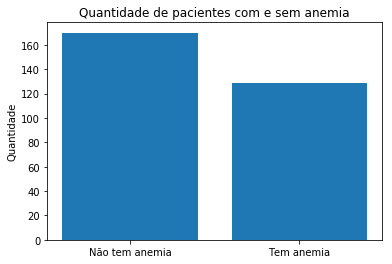

In [35]:
plt.bar(labelsNomesAnemia,dadosClinicos.anaemia.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes com e sem anemia')

In [36]:
# Exploração da varíavel creatinine_phosphokinase

In [37]:
# Resumo estástico básico
dadosClinicos.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Text(0.5,1,'Boxplot de creatinine_phosphokinase')

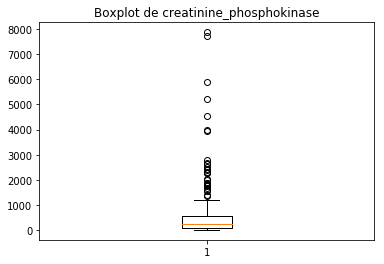

In [38]:
plt.boxplot(dadosClinicos.creatinine_phosphokinase)
plt.title('Boxplot de creatinine_phosphokinase')
# Note que há bastante outliers, necessário ajustar para o modelo preditivo

Text(0.5,1,'Histograma de creatinine_phosphokinase (CPK) no sangue')

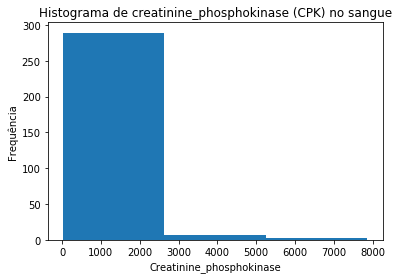

In [39]:
plt.hist(dadosClinicos.creatinine_phosphokinase,bins = 3)
plt.xlabel("Creatinine_phosphokinase")
plt.ylabel("Frequência")
plt.title("Histograma de creatinine_phosphokinase (CPK) no sangue")

In [41]:
# Exploração da variável diabetes (categórica)

In [42]:
# Contagem de valores
dadosClinicos.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

Text(0.5,1,'Porcentagem de pacientes com diabetes')

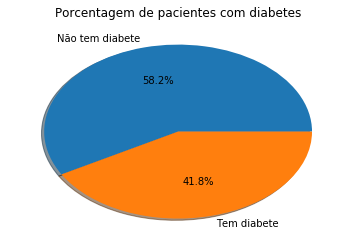

In [43]:
labelsNomesDiabetes = "Não tem diabete","Tem diabete "
plt.pie(dadosClinicos.diabetes.value_counts(),labels = labelsNomesDiabetes, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com diabetes')

Text(0.5,1,'Quantidade de pacientes sem e com diabete')

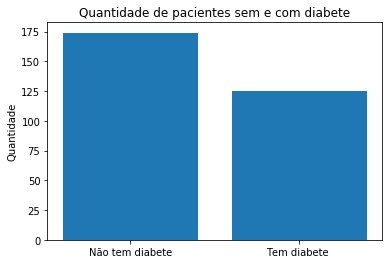

In [44]:
plt.bar(labelsNomesDiabetes,dadosClinicos.diabetes.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes sem e com diabete')

In [45]:
# Exploração da varíavel ejection_fraction

In [46]:
# Resumo estástico rápido
dadosClinicos.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Text(0.5,1,'Boxplot de ejection_fraction')

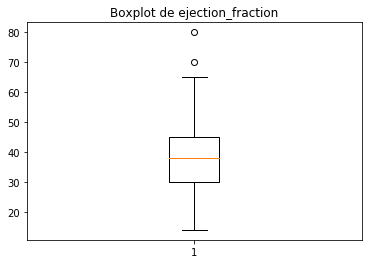

In [47]:
plt.boxplot(dadosClinicos.ejection_fraction)
plt.title('Boxplot de ejection_fraction')

Text(0.5,1,"Histograma de 'ejection_fraction'")

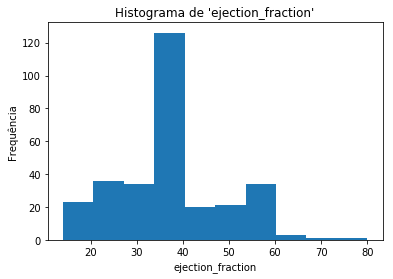

In [48]:
plt.hist(dadosClinicos.ejection_fraction)
plt.xlabel("ejection_fraction")
plt.ylabel("Frequência")
plt.title("Histograma de 'ejection_fraction'")

In [49]:
# Exploração da variável 'high_blood_pressure' (categórica)

In [50]:
# Contagem de valores
dadosClinicos.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

Text(0.5,1,'Porcentagem de pacientes com pressão alta')

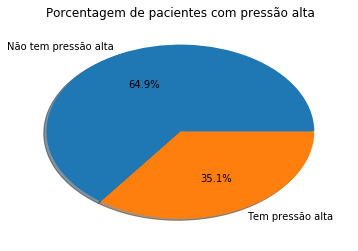

In [51]:
labelsNomesPressaoAlta = "Não tem pressão alta","Tem pressão alta "
plt.pie(dadosClinicos.high_blood_pressure.value_counts(),labels = labelsNomesPressaoAlta, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de pacientes com pressão alta')

Text(0.5,1,'Quantidade de pacientes sem e com pressão alta')

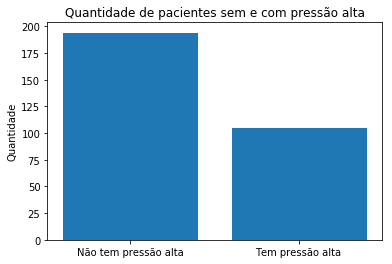

In [52]:
# Quantidade
plt.bar(labelsNomesPressaoAlta,dadosClinicos.high_blood_pressure.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de pacientes sem e com pressão alta')
# plt.hist(dadosClinicos.ejection_fraction, bins = 2) # não agrega muito

In [53]:
# Exploração da varíavel platelets (quantitativa)

In [54]:
# Resumo estátistico breve
dadosClinicos.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Text(0.5,1,'Boxplot Plaquetas (mg/mL) no sangue')

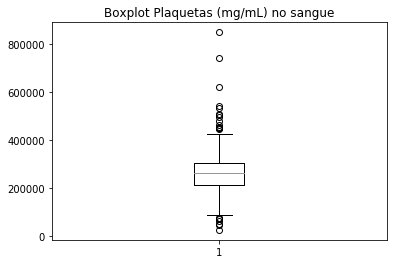

In [55]:
plt.boxplot(dadosClinicos.platelets)
plt.title('Boxplot Plaquetas (mg/mL) no sangue')
# Note que há bastante outliers

Text(0,0.5,'Frequência')

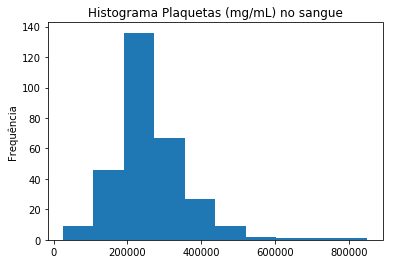

In [56]:
plt.hist(dadosClinicos.platelets)
plt.title('Histograma Plaquetas (mg/mL) no sangue')
plt.ylabel('Frequência')

In [57]:
# Exploração variável quantitativa 'serum_creatinine' 

In [58]:
# Resumo estástico rápido
dadosClinicos.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Text(0.5,1,'Boxplot - Nível de creatinina sérica no sangue (mg / dL)')

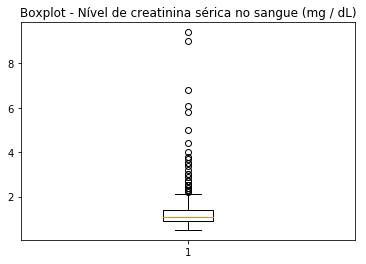

In [59]:
plt.boxplot(dadosClinicos.serum_creatinine)
plt.title('Boxplot - Nível de creatinina sérica no sangue (mg / dL)')
# Há bastante valores outliers

Text(0,0.5,'Frequência')

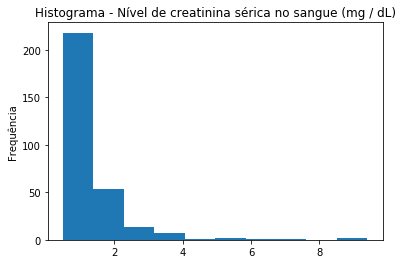

In [60]:
plt.hist(dadosClinicos.serum_creatinine)
plt.title('Histograma - Nível de creatinina sérica no sangue (mg / dL)')
plt.ylabel('Frequência')

In [61]:
# Exploração da varíavel serum_sodium (quantitativa)

In [62]:
# Resumo estástico rápido
dadosClinicos.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Text(0.5,1,'Boxplot - Nível de sódio sérico no sangue (mEq / L)')

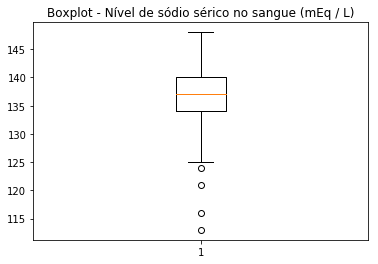

In [63]:
plt.boxplot(dadosClinicos.serum_sodium)
plt.title('Boxplot - Nível de sódio sérico no sangue (mEq / L)')

Text(0,0.5,'Frequência')

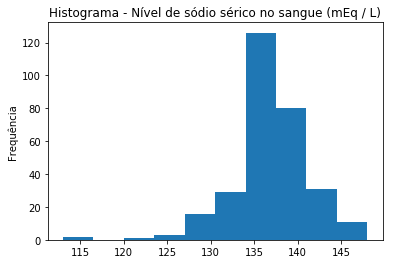

In [64]:
plt.hist(dadosClinicos.serum_sodium)
plt.title('Histograma - Nível de sódio sérico no sangue (mEq / L)')
plt.ylabel('Frequência')

In [65]:
# Exploração da varíavel sex (categórica)

In [66]:
# Contagem de valores
dadosClinicos.sex.value_counts()

M    194
F    105
Name: sex, dtype: int64

Text(0.5,1,'Porcentagem de sexo')

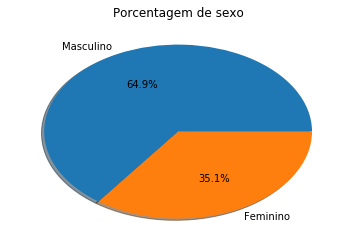

In [67]:
labelsNomesSexo = "Masculino","Feminino"
plt.pie(dadosClinicos.sex.value_counts(),labels = labelsNomesSexo, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de sexo')

Text(0.5,1,'Quantidade de sexo de pacientes')

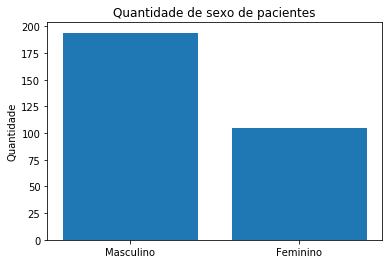

In [68]:
# Quantidade
plt.bar(labelsNomesSexo,dadosClinicos.sex.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de sexo de pacientes')

In [69]:
# Exploração da varíavel smoking (categórica)

In [70]:
# Contagem de valores
dadosClinicos.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

Text(0.5,1,'Porcentagem de fumantes')

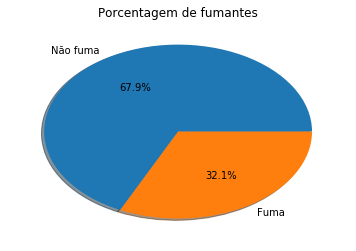

In [71]:
labelsNomesFumantesOuNao = "Não fuma","Fuma"
plt.pie(dadosClinicos.smoking.value_counts(),labels = labelsNomesFumantesOuNao, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de fumantes')

Text(0.5,1,'Quantidade de fumantes')

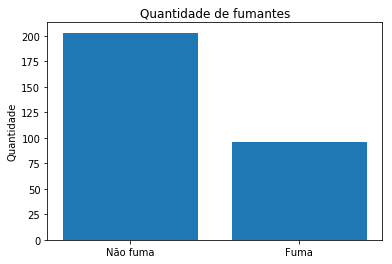

In [72]:
# Quantidade
plt.bar(labelsNomesFumantesOuNao,dadosClinicos.smoking.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de fumantes')

In [73]:
# Exploração da varíavel time representando número de dias (categórica)

In [74]:
# Contagem de valores
dadosClinicos.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

Text(0.5,1,'Boxplot - Período de acompanhamento em dias')

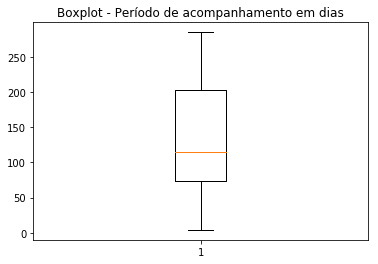

In [75]:
plt.boxplot(dadosClinicos.time)
plt.title('Boxplot - Período de acompanhamento em dias')

Text(0,0.5,'Frequência')

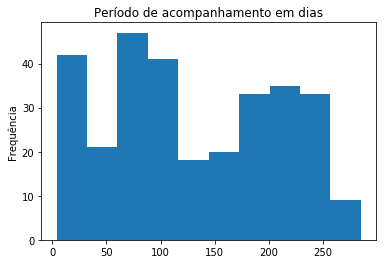

In [76]:
plt.hist(dadosClinicos.time)
plt.title('Período de acompanhamento em dias')
plt.ylabel('Frequência')

In [77]:
dadosClinicos.time

0        4
1        6
2        7
3        7
4        8
5        8
6       10
7       10
8       10
9       10
10      10
11      10
12      11
13      11
14      12
15      13
16      14
17      14
18      15
19      15
20      16
21      20
22      20
23      22
24      23
25      23
26      24
27      26
28      26
29      26
      ... 
269    244
270    244
271    244
272    245
273    245
274    245
275    245
276    245
277    246
278    246
279    246
280    247
281    250
282    250
283    250
284    250
285    250
286    250
287    250
288    256
289    256
290    257
291    258
292    258
293    270
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64

In [78]:
# Exploração varíavel categórica dieOrNot

In [79]:
dadosClinicos.dieOrNot.value_counts()

False    203
True      96
Name: dieOrNot, dtype: int64

Text(0.5,1,'Porcentagem de Mortes')

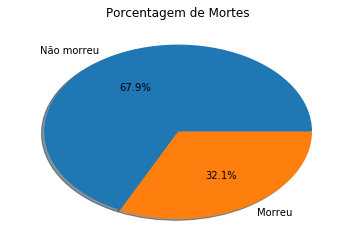

In [80]:
labelsNomesMorteOuNao = "Não morreu","Morreu"
plt.pie(dadosClinicos.dieOrNot.value_counts(),labels = labelsNomesMorteOuNao, autopct='%1.1f%%', shadow = True)
plt.title('Porcentagem de Mortes')

Text(0.5,1,'Quantidade de Mortes')

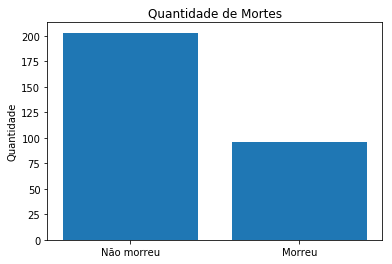

In [81]:
# Quantidade
plt.bar(labelsNomesMorteOuNao,dadosClinicos.dieOrNot.value_counts())
plt.ylabel('Quantidade')
plt.title('Quantidade de Mortes')

In [82]:
# Análise multivariada (duas ou mais varíaveis). 

In [83]:
# Correlação entre variáveis. 
# Correlação varia entre -1 (correlação negativa: uma diminui, outra aumenta) a 1 (correlação positiva, ambas
# variáveis vão no mesmo sentido). Correlação identifica o relacionamento linear entre variáveis, o que 
# não significa causalidade.
# corr() = a correlação de Pearson
dadosClinicos.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,dieOrNot
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,0.028234,0.010514,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,-0.027414,-0.149315,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,0.004813,0.087640,-0.195204
smoking,0.018926,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,1.000000,-0.022839,-0.012623


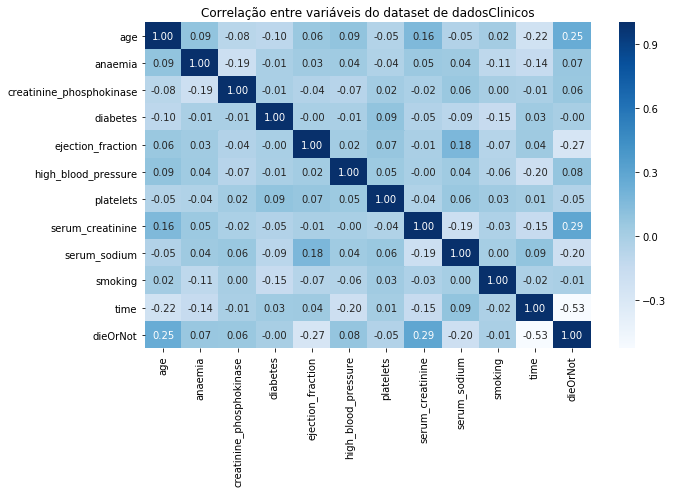

In [84]:
# Gráfico de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(dadosClinicos.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de dadosClinicos')
plt.show()
# As correlação estão fracas, considere que boas seriam em torno de 70% ...

In [85]:
# Análise: idade e nível de creatinine_phosphokinase                     

Text(0.5,1,'Relação Idade x Nível de creatinina sérica')

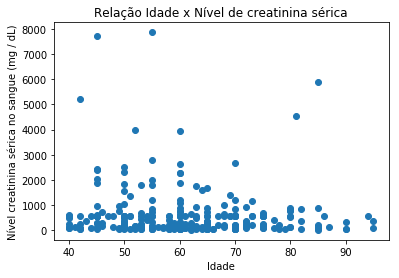

In [86]:
# Comprovando a correlação, por exemplo, entre age e creatinine_phosphokinase, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.creatinine_phosphokinase)
plt.xlabel("Idade")
plt.ylabel("Nível creatinina sérica no sangue (mg / dL)")
plt.title('Relação Idade x Nível de creatinina sérica')

In [87]:
# Análise: idade x nível de ejection_fraction

Text(0.5,1,'Nível de sódio sérico no sangue (mEq / L)')

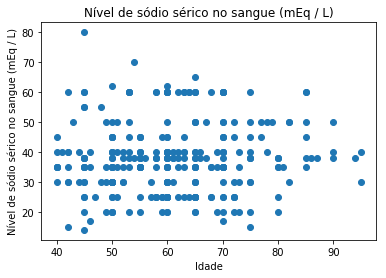

In [88]:
# Comprovando a correlação, por exemplo, entre age e ejection_fraction, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.ejection_fraction)
plt.xlabel("Idade")
plt.ylabel("Nível de sódio sérico no sangue (mEq / L)")
plt.title("Nível de sódio sérico no sangue (mEq / L)")

In [89]:
# Análise: idades x plaquetas

Text(0.5,1,'Nível Plaquetas (mg/mL) no sangue por idade')

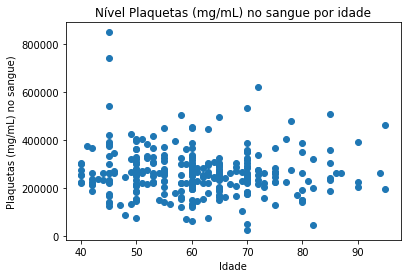

In [90]:
# Comprovando a correlação, por exemplo, entre age e plaquetas, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.platelets)
plt.xlabel("Idade")
plt.ylabel("Plaquetas (mg/mL) no sangue)")
plt.title("Nível Plaquetas (mg/mL) no sangue por idade")

In [91]:
# Análise: idades x serum_creatinine

Text(0.5,1,"Nível serum_creatinine'enzima CPK' (mg/mL)  por idade")

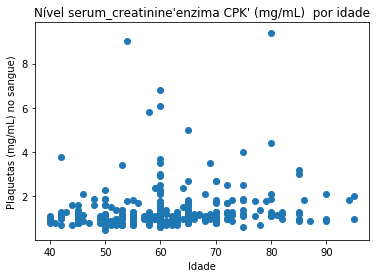

In [92]:
# Comprovando a correlação, por exemplo, entre age e serum_creatinine, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.serum_creatinine)
plt.xlabel("Idade")
plt.ylabel("Plaquetas (mg/mL) no sangue)")
plt.title("Nível serum_creatinine'enzima CPK' (mg/mL)  por idade")

In [93]:
# Análise: idades x serum_sodium 

Text(0.5,1,'Nível serum_sodium por idade')

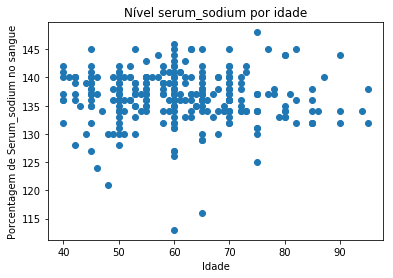

In [94]:
# Comprovando a correlação, por exemplo, entre age e serum_creatinine, que está muito fraca
plt.scatter(dadosClinicos.age,dadosClinicos.serum_sodium)
plt.xlabel("Idade")
plt.ylabel("Porcentagem de Serum_sodium no sangue")
plt.title("Nível serum_sodium por idade")

In [95]:
# Teste do comportamento bool em Python
print(bool(0)) # 0 = False, 1 = True

False


Text(0.5,1,'Contagem de Pacientes Anémicos por Sexo')

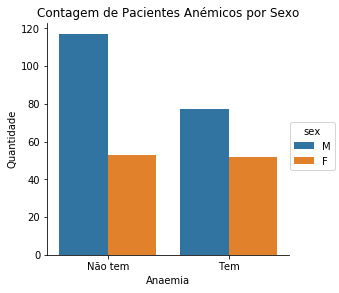

In [96]:
# Contar quantos tem anaemia categorizando por sexo
anaemia_map = {0: 'Não tem', 1: 'Tem'}
sns.factorplot('anaemia',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(anaemia_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Anaemia')
plt.title('Contagem de Pacientes Anémicos por Sexo')

In [97]:
# Contar quantos são diabéticos por sexo 

Text(0.5,1,'Contagem de Pacientes Diabéticos por Sexo')

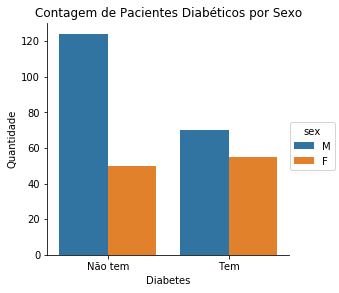

In [98]:
diabete_map = {0: 'Não tem', 1: 'Tem'}
sns.factorplot('diabetes',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(diabete_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Diabetes')
plt.title('Contagem de Pacientes Diabéticos por Sexo')

In [ ]:
# Contagem de Pacientes Fumantes por Sexo

Text(0.5,1,'Contagem de Pacientes Fumantes por Sexo')

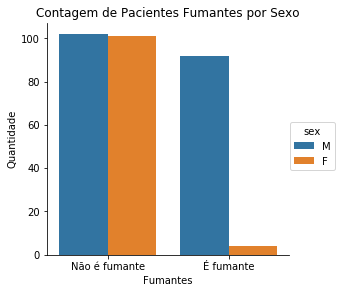

In [100]:
fumantes_map = {0: 'Não é fumante', 1: 'É fumante'}
sns.factorplot('smoking',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(fumantes_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Fumantes')
plt.title('Contagem de Pacientes Fumantes por Sexo')

In [ ]:
# Contar quantos tem pressão alta por sexo

Text(0.5,1,'Contagem de Pacientes por Pressão Alta por Sexo')

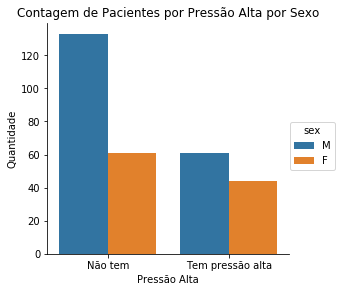

In [109]:
pressaoAltaouNao_map = {0: 'Não tem', 1: 'Tem pressão alta'}
sns.factorplot('high_blood_pressure',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(pressaoAltaouNao_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Pressão Alta')
plt.title('Contagem de Pacientes por Pressão Alta por Sexo')

In [101]:
# Contar quantos morreram baseado no sexo

Text(0.5,1,'Contagem de Órbitos por Sexo')

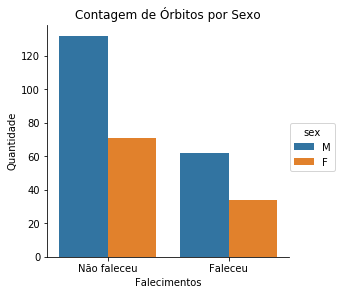

In [102]:
morreramOuNao_map = {0: 'Não faleceu', 1: 'Faleceu'}
sns.factorplot('dieOrNot',data = dadosClinicos, kind='count',hue = 'sex').set_xticklabels(morreramOuNao_map.values())
plt.ylabel('Quantidade')
plt.xlabel('Falecimentos')
plt.title('Contagem de Órbitos por Sexo')

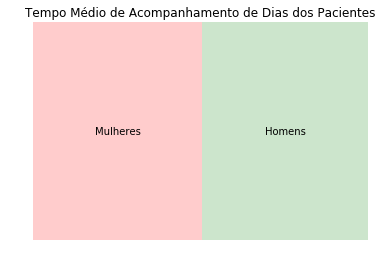

sex
F    131.904762
M    129.371134
Name: time, dtype: float64

In [249]:
# Tempo médio de acompanhamento em dias por sexo (total)
tempoMediaAcompanhSexo = dadosClinicos.groupby(['sex']).mean()
squarify.plot(sizes=[tempoMediaAcompanhSexo.iloc[0].time,
                     tempoMediaAcompanhSexo.iloc[1].time], label=["Mulheres", "Homens"], 
              color=["red","green"], alpha=.2)
plt.title('Tempo Médio de Acompanhamento de Dias dos Pacientes')
plt.axis('off')
plt.show()
tempoMediaAcompanhSexo.time

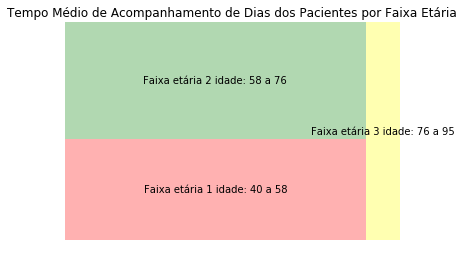

In [251]:
# Tempo de acompanhamento em dias por faixa de idade
valorMin = dadosClinicos.age.min()
valorMax = dadosClinicos.age.max()
divParte = (valorMax - valorMin)/3
squarify.plot(sizes=[len(dadosClinicos[dadosClinicos['age'].between(valorMin,valorMin+divParte)]),
                     len(dadosClinicos[dadosClinicos['age'].between(valorMin+divParte,valorMin+(divParte*2))]),
                     len(dadosClinicos[dadosClinicos['age'].between(valorMin+(divParte*2),valorMax)])
                    ], 
              label=["Faixa etária 1 idade: %d a %d" %(valorMin,valorMin+divParte), 
                     "Faixa etária 2 idade: %d a %d" %(valorMin+divParte,valorMin+(divParte*2)),
                     "Faixa etária 3 idade: %d a %d" %(valorMin+(divParte*2),valorMax)], 
              color=["red","green","yellow"], alpha=.3)
plt.title('Tempo Médio de Acompanhamento de Dias dos Pacientes por Faixa Etária')
plt.axis('off')
plt.show()